> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# [No_show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>‘ScheduledDay’ tells us on what day the patient set up their appointment.

>‘Neighborhood’ indicates the location of the hospital.

>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>in show up column it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. 


### Question(s) for Analysis
>What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?




In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


# i deleted this code because it is just get errors and not valuable


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [55]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [56]:
df.shape


(110527, 14)

In [57]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


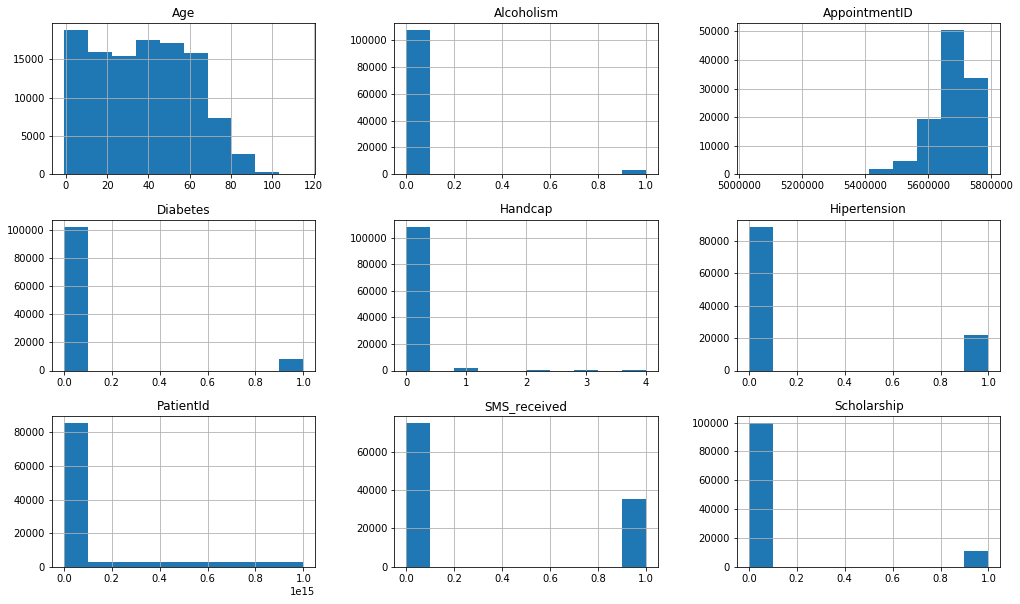

In [60]:
df.hist(figsize=(17,10));


### Data Cleaning
> I think we wouldn't use (AppointmentID,PatientId,Handcap) it's just for data base

In [61]:
df.drop(['AppointmentID','PatientId','Handcap'], axis = 1, inplace = True)


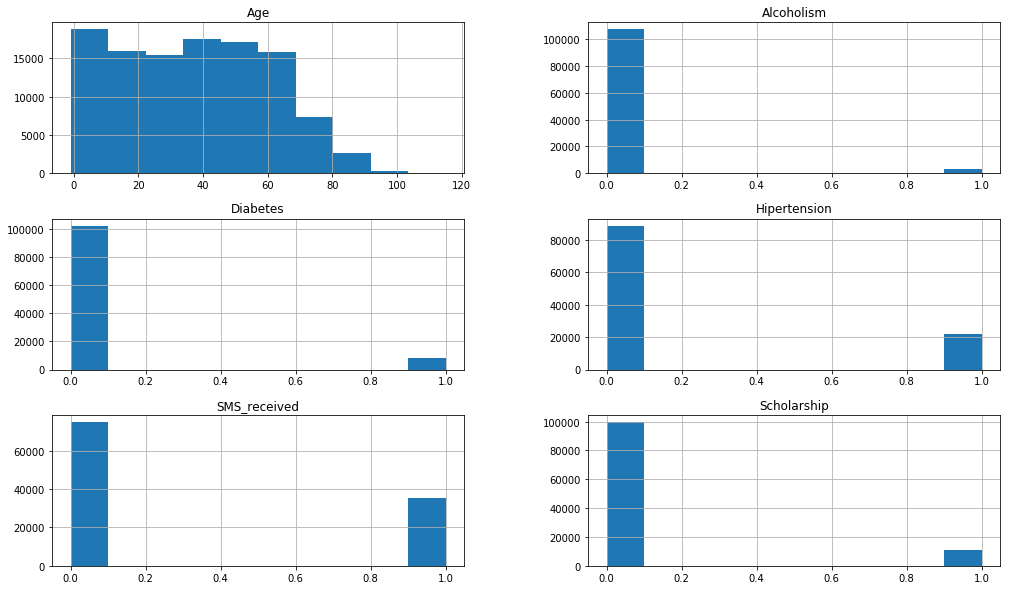

In [62]:
df.hist(figsize=(17,10));

In [63]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [64]:
df_1=df[df['Age']==-1]
df_1

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,No


In [65]:
df.drop(df.index[99832],inplace=True)
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,No
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,Yes
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,No
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,No


In [66]:
df.isna().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
SMS_received      0
No-show           0
dtype: int64

In [67]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
SMS_received      0
No-show           0
dtype: int64

In [68]:
#there are no missing values

In [69]:
df.rename(columns={'No-show':'Show'},inplace=True)

In [70]:
df["SMS_received"].replace({0: "Didnot_Recieved_SMS", 1: "Recieved_SMS"}, inplace=True)
df["Alcoholism"].replace({0: "Donot_Alcoholism", 1: "Alcoholism"}, inplace=True)
df["Scholarship"].replace({0: "Didnot_Have_Scholarship", 1: "Have_Scholarship"}, inplace=True)
df["Hipertension"].replace({0: "Donot_Have_Hipertension", 1: "Have_Hipertension"}, inplace=True)
df["Diabetes"].replace({0: "Donot_Have_Diabetes", 1: "Have_Diabetes"}, inplace=True)
df["Show"].replace({"Yes": "NO", "No": "Yes"}, inplace=True)

In [71]:
df.head(100)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,Didnot_Have_Scholarship,Have_Hipertension,Donot_Have_Diabetes,Donot_Alcoholism,Didnot_Recieved_SMS,Yes
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,Didnot_Have_Scholarship,Donot_Have_Hipertension,Donot_Have_Diabetes,Donot_Alcoholism,Didnot_Recieved_SMS,Yes
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,Didnot_Have_Scholarship,Donot_Have_Hipertension,Donot_Have_Diabetes,Donot_Alcoholism,Didnot_Recieved_SMS,Yes
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,Didnot_Have_Scholarship,Donot_Have_Hipertension,Donot_Have_Diabetes,Donot_Alcoholism,Didnot_Recieved_SMS,Yes
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,Didnot_Have_Scholarship,Have_Hipertension,Have_Diabetes,Donot_Alcoholism,Didnot_Recieved_SMS,Yes
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,Didnot_Have_Scholarship,Have_Hipertension,Donot_Have_Diabetes,Donot_Alcoholism,Didnot_Recieved_SMS,Yes
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,Didnot_Have_Scholarship,Donot_Have_Hipertension,Donot_Have_Diabetes,Donot_Alcoholism,Didnot_Recieved_SMS,NO
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,Didnot_Have_Scholarship,Donot_Have_Hipertension,Donot_Have_Diabetes,Donot_Alcoholism,Didnot_Recieved_SMS,NO
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,Didnot_Have_Scholarship,Donot_Have_Hipertension,Donot_Have_Diabetes,Donot_Alcoholism,Didnot_Recieved_SMS,Yes
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,Didnot_Have_Scholarship,Donot_Have_Hipertension,Donot_Have_Diabetes,Donot_Alcoholism,Didnot_Recieved_SMS,Yes


<a id='eda'></a>
## Exploratory Data Analysis

>Firstly:i made simple report about the data seperatly



>Secondly:i tried to fogure out some relation between no-show column and other columns

### Small report about the people in the program

# No show percentage

In [72]:
Show=sum(df['Show'] == 'Yes') / len(df)
Didnot_Show=sum(df['Show'] == 'NO') / len(df)
Percentage_show={'No':Didnot_Show*100,'Yes':Show*100}
Percentage_show

{'No': 20.193438647919944, 'Yes': 79.80656135208005}

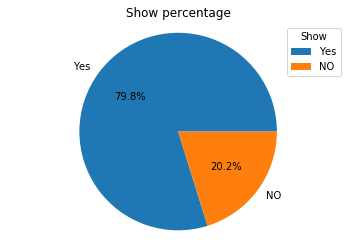

In [73]:
index=df['Show'].unique()
Show=df['Show'].value_counts()
f, ax1 = plt.subplots()
ax1.pie(labels=index, autopct='%1.1f%%',x=Show)
ax1.axis('equal')
plt.title("Show percentage")
ax1.legend(title='Show')
plt.show()

                                  this visualization is useful to know the percentage of people who show in them appointment

## percentage of people who are Alcoholism

In [74]:
not_Alcoholism=sum(df['Alcoholism'] == 'Donot_Alcoholism') / len(df)
Alcoholism=sum(df['Alcoholism'] == 'Alcoholism') / len(df)
Percentage_Alcoholism={'No':not_Alcoholism*100,'Yes':Alcoholism*100}
Percentage_Alcoholism

{'No': 96.95999131426089, 'Yes': 3.040008685739102}

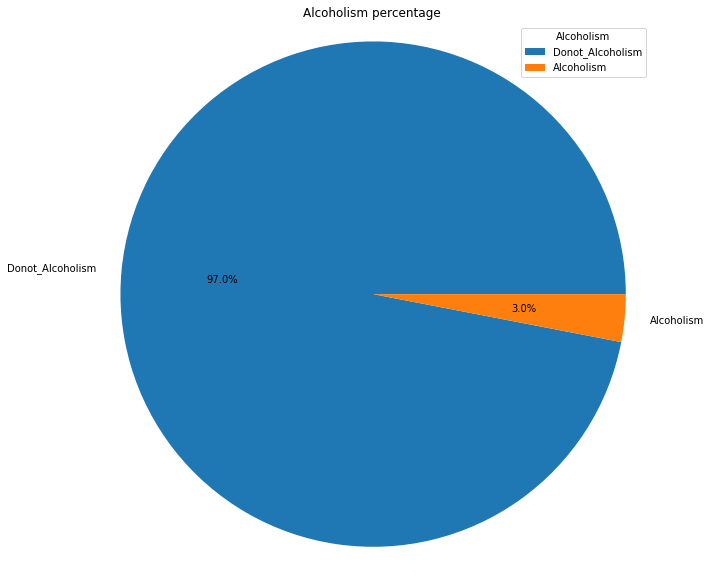

In [75]:
index=df['Alcoholism'].unique()
Alcoholism=df['Alcoholism'].value_counts()
f, ax1 = plt.subplots(1,figsize=(10,10))
ax1.pie(labels=index, autopct='%1.1f%%',x=Alcoholism)
ax1.axis('equal')
plt.title("Alcoholism percentage")
ax1.legend(title='Alcoholism')
plt.show()

                                    this visualization is useful to know the percentage of people who have alcholic issues

# percentage of people who received SMS

In [76]:
SMS_received=sum(df['SMS_received'] == 'Recieved_SMS') / len(df)
SMS_didnot_received=sum(df['SMS_received'] == 'Didnot_Recieved_SMS') / len(df)
Percentage_SMS_received={'No':SMS_didnot_received*100,'Yes':SMS_received*100}
Percentage_SMS_received

{'No': 67.89714637279916, 'Yes': 32.10285362720084}

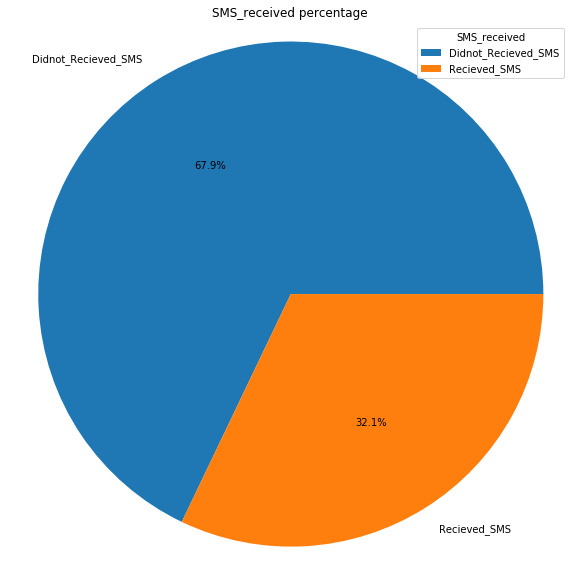

In [77]:
index=df['SMS_received'].unique()
SMS_received=df['SMS_received'].value_counts()
f, ax1 = plt.subplots(1,figsize=(10,10))
ax1.pie(labels=index, autopct='%1.1f%%',x=SMS_received)
ax1.axis('equal')
plt.title("SMS_received percentage")
ax1.legend(title='SMS_received')
plt.show()

                                             this visualization is useful to know the percentage of people who Recieved SMS

# percentage of people who have diabetes

In [78]:

have_no_Diabetes=sum(df['Diabetes'] == 'Donot_Have_Diabetes') / len(df)
Diabetes=sum(df['Diabetes'] == 'Have_Diabetes') / len(df)
Percentage_Diabetes={'No':have_no_Diabetes*100,'Yes':Diabetes*100}
Percentage_Diabetes

{'No': 92.81345565749236, 'Yes': 7.186544342507645}

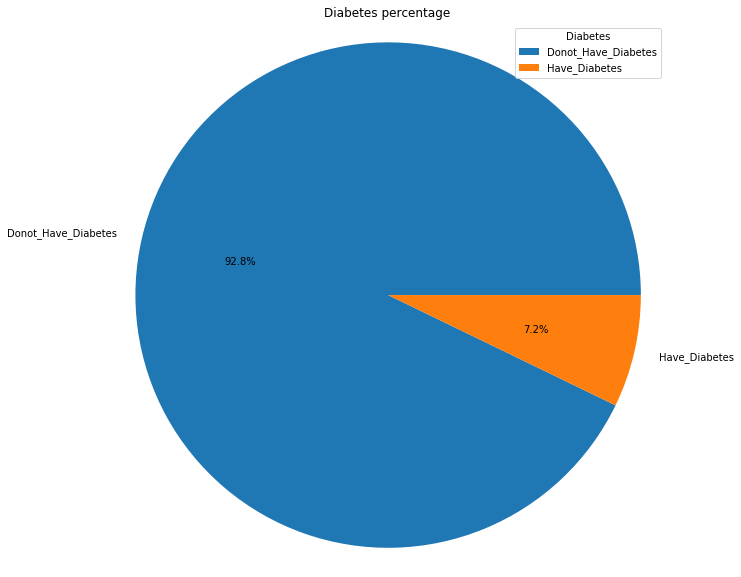

In [79]:
index=df['Diabetes'].unique()
Diabetes=df['Diabetes'].value_counts()
f, ax1 = plt.subplots(1,figsize=(10,10))
ax1.pie(labels=index, autopct='%1.1f%%',x=Diabetes)
ax1.axis('equal')
plt.title("Diabetes percentage")
ax1.legend(title='Diabetes')
plt.show()

                                             this visualization is useful to know the percentage of people who have diabetes

# percentage of people who have Hipertension

In [80]:

have_no_Hipertension=sum(df['Hipertension'] == "Donot_Have_Hipertension") / len(df)
Hipertension=sum(df['Hipertension'] == "Have_Hipertension") / len(df)
Percentage_Hipertension={'No':have_no_Hipertension*100,'Yes':Hipertension*100}
Percentage_Hipertension

{'No': 80.27522935779817, 'Yes': 19.724770642201836}

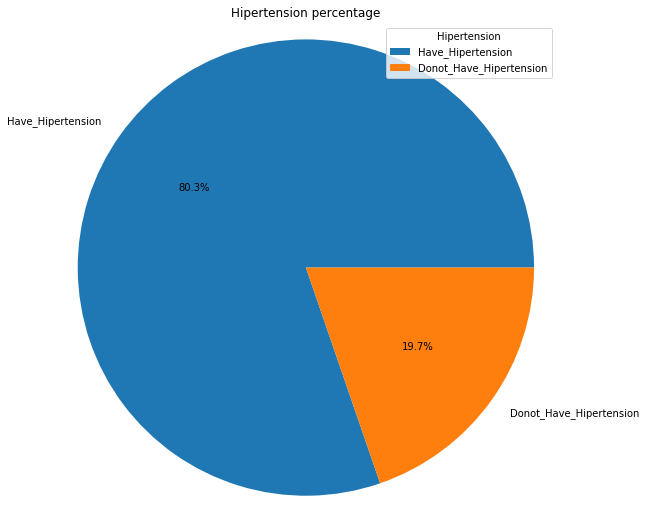

In [81]:
index=df['Hipertension'].unique()
Hipertension=df['Hipertension'].value_counts()
f, ax1 = plt.subplots(1,figsize=(9,9))
ax1.pie(labels=index, autopct='%1.1f%%',x=Hipertension)
ax1.axis('equal')
plt.title("Hipertension percentage")
ax1.legend(title='Hipertension')
plt.show()

                                        this visualization is useful to know the percentage of people who have Hipertension

# Number of every age

In [82]:
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

# Number of people who joined the program from every neighbourhood

In [83]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

# percentage of people who have Scholarship

In [84]:
have_no_Scholarship=sum(df['Scholarship'] == 'Didnot_Have_Scholarship') / len(df)
Scholarship=sum(df['Scholarship'] == 'Have_Scholarship') / len(df)
Percentage_Scholarship={'No':have_no_Scholarship*100,'Yes':Scholarship*100}
Percentage_Scholarship

{'No': 90.17335287624631, 'Yes': 9.826647123753688}

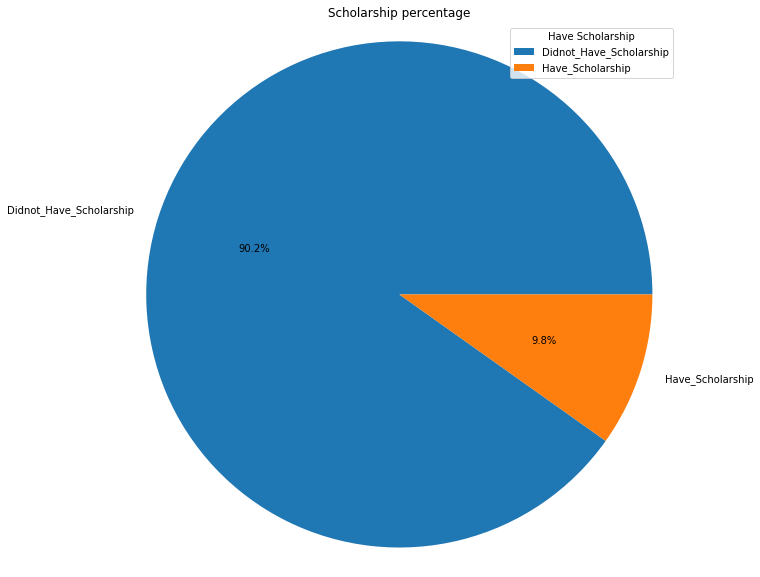

In [85]:
index=df['Scholarship'].unique()
Scholarship=df['Scholarship'].value_counts()
f, ax1 = plt.subplots(1,figsize=(10,10))
ax1.pie(labels=index, autopct='%1.1f%%',x=Scholarship)
ax1.axis('equal')
plt.title("Scholarship percentage")
ax1.legend(title='Have Scholarship')
plt.show()

                                     this visualization is useful to know the percentage of people who came with scholarship

# First question:-
# What factors would effect on show in the appoinment ?

<a id='alcholism'></a>
# show_Relation_with_Alcoholism

In [86]:
filter_1 = df[df['Show'] == 'Yes']
result_1=  filter_1[filter_1['Alcoholism'] == 'Alcoholism']
conclusion_1=len(result_1)/len(df)
filter_2 = df[df['Show'] == 'NO']
result_2= filter_2[filter_2['Alcoholism'] == 'Alcoholism']
conclusion_2=len(result_2)/len(df)
filter_3 = df[df['Show'] == 'Yes']
result_3=  filter_3[filter_3['Alcoholism'] == 'Donot_Alcoholism']
conclusion_3=len(result_3)/len(df)
filter_4 = df[df['Show'] == 'NO']
result_4=  filter_4[filter_4['Alcoholism'] == 'Donot_Alcoholism']
conclusion_4=len(result_4)/len(df)
relation_Showing_Alcoholism={'Showing and Alcoholism':conclusion_1*100,'not Showing and Alcoholism':conclusion_2*100,'Showing and not Alcoholism':conclusion_3*100,'not Showing and not Alcoholism':conclusion_4*100}
relation_Showing_Alcoholism

{'Showing and Alcoholism': 2.427483126142265,
 'not Showing and Alcoholism': 0.612525559596837,
 'Showing and not Alcoholism': 77.37907822593779,
 'not Showing and not Alcoholism': 19.58091308832311}

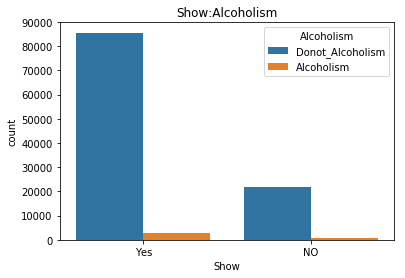

In [87]:
ax= sns.countplot(x="Show", hue="Alcoholism", data=df)
plt.title("Show:Alcoholism")
plt.show()

                                this visualization is useful to know the relation between showing and having alcholic issues

<a id='SMS'></a>
# show_Relation_with_SMS

In [88]:
filter_1 = df[df['Show'] == 'Yes']
result_1=  filter_1[filter_1['SMS_received'] == 'Recieved_SMS']
conclusion_1=len(result_1)/len(df)
filter_2 = df[df['Show'] == 'NO']
result_2= filter_2[filter_2['SMS_received'] == 'Recieved_SMS']
conclusion_2=len(result_2)/len(df)
filter_3 = df[df['Show'] == 'Yes']
result_3=  filter_3[filter_3['SMS_received'] == 'Didnot_Recieved_SMS']
conclusion_3=len(result_3)/len(df)
filter_4 = df[df['Show'] == 'NO']
result_4=  filter_4[filter_4['SMS_received'] == 'Didnot_Recieved_SMS']
conclusion_4=len(result_4)/len(df)
relation_Showing_SMS={'Showing and recieved SMS':conclusion_1*100,'not Showing and recieved SMS':conclusion_2*100,'Showing and didnot recieve SMS':conclusion_3*100,'not Showing and didnot recieve SMS':conclusion_4*100}
relation_Showing_SMS

{'Showing and recieved SMS': 23.250637858965312,
 'not Showing and recieved SMS': 8.85221576823553,
 'Showing and didnot recieve SMS': 56.55592349311475,
 'not Showing and didnot recieve SMS': 11.341222879684418}

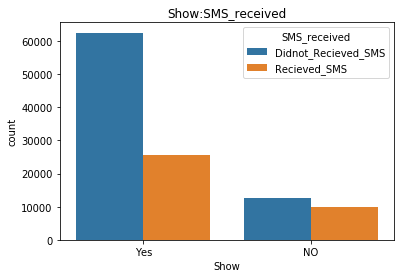

In [89]:
ax= sns.countplot(x="Show", hue="SMS_received", data=df)
plt.title("Show:SMS_received")
plt.show()

                             this visualization is useful to know the relation between showing and recieving the SMS message

<a id='Diabetes'></a>
# show_Relation_with_Diabetes

In [90]:
filter_1 = df[df['Show'] == 'Yes']
result_1=  filter_1[filter_1['Diabetes'] == 'Have_Diabetes']
conclusion_1=len(result_1)/len(df)
filter_2 = df[df['Show'] == 'NO']
result_2= filter_2[filter_2['Diabetes'] == 'Have_Diabetes']
conclusion_2=len(result_2)/len(df)
filter_3 = df[df['Show'] == 'Yes']
result_3=  filter_3[filter_3['Diabetes'] == 'Donot_Have_Diabetes']
conclusion_3=len(result_3)/len(df)
filter_4 = df[df['Show'] == 'NO']
result_4=  filter_4[filter_4['Diabetes'] == 'Donot_Have_Diabetes']
conclusion_4=len(result_4)/len(df)
relation_Showing_diabetes={'Showing and have diabetes':conclusion_1*100,'not Showing and have diabetes':conclusion_2*100,'Showing and donot have diabetes':conclusion_3*100,'not Showing and donot have diabetes':conclusion_4*100}
relation_Showing_diabetes

{'Showing and have diabetes': 5.892731122088921,
 'not Showing and have diabetes': 1.293813220418725,
 'Showing and donot have diabetes': 73.91383022999113,
 'not Showing and donot have diabetes': 18.89962542750122}

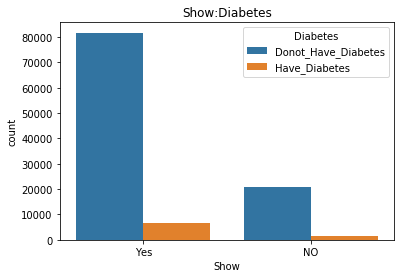

In [91]:
ax= sns.countplot(x="Show", hue="Diabetes", data=df)
plt.title("Show:Diabetes")
plt.show()

                                       this visualization is useful to know the relation between showing and Having diabetes

<a id='Hipertension'></a>
# show_Relation_with_Hipertension

In [92]:
filter_1 = df[df['Show'] == 'Yes']
result_1=  filter_1[filter_1['Hipertension'] == 'Have_Hipertension']
conclusion_1=len(result_1)/len(df)
filter_2 = df[df['Show'] == 'NO']
result_2= filter_2[filter_2['Hipertension'] == 'Have_Hipertension']
conclusion_2=len(result_2)/len(df)
filter_3 = df[df['Show'] == 'Yes']
result_3=  filter_3[filter_3['Hipertension'] == 'Donot_Have_Hipertension']
conclusion_3=len(result_3)/len(df)
filter_4 = df[df['Show'] == 'NO']
result_4=  filter_4[filter_4['Hipertension'] == 'Donot_Have_Hipertension']
conclusion_4=len(result_4)/len(df)
relation_Showing_Hipertension={'Showing and have Hipertension':conclusion_1*100,'not Showing and have Hipertension':conclusion_2*100,'Showing and donot have Hipertension':conclusion_3*100,'not Showing and donot have Hipertension':conclusion_4*100}
relation_Showing_Hipertension

{'Showing and have Hipertension': 16.311998986663774,
 'not Showing and have Hipertension': 3.412771655538063,
 'Showing and donot have Hipertension': 63.494562365416286,
 'not Showing and donot have Hipertension': 16.78066699238188}

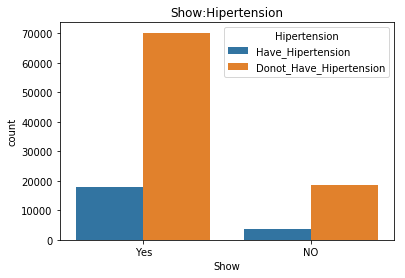

In [93]:
ax= sns.countplot(x="Show", hue="Hipertension", data=df)
plt.title("Show:Hipertension")
plt.show()

                                  this visualization is useful to know the relation between showing and Having Hipertension

<a id='Scholarship'></a>
# show_Relation_with_Scholarship

In [94]:
filter_1 = df[df['Show'] == 'Yes']
result_1=  filter_1[filter_1['Scholarship'] == 'Have_Scholarship']
conclusion_1=len(result_1)/len(df)
filter_2 = df[df['Show'] == 'NO']
result_2= filter_2[filter_2['Scholarship'] == 'Have_Scholarship']
conclusion_2=len(result_2)/len(df)
filter_3 = df[df['Show'] == 'Yes']
result_3=  filter_3[filter_3['Scholarship'] == 'Didnot_Have_Scholarship']
conclusion_3=len(result_3)/len(df)
filter_4 = df[df['Show'] == 'NO']
result_4=  filter_4[filter_4['Scholarship'] == 'Didnot_Have_Scholarship']
conclusion_4=len(result_4)/len(df)
relation_Showing_Scholarship={'Showing and have Scholarship':conclusion_1*100,'not Showing and have Scholarship':conclusion_2*100,'Showing and donot have Scholarship':conclusion_3*100,'not Showing and donot have Scholarship':conclusion_4*100}
relation_Showing_Scholarship

{'Showing and have Scholarship': 7.494164269040769,
 'not Showing and have Scholarship': 2.332482854712918,
 'Showing and donot have Scholarship': 72.31239708303929,
 'not Showing and donot have Scholarship': 17.86095579320703}

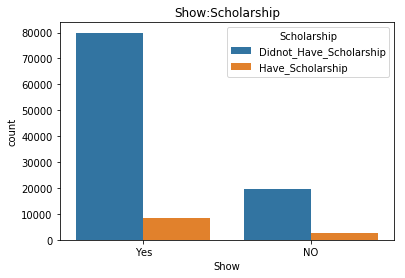

In [95]:
ax= sns.countplot(x="Show", hue="Scholarship", data=df)
plt.title("Show:Scholarship")
plt.show()

                                    this visualization is useful to know the relation between showing and Having Scholarship

<a id='Gender'></a>
# show_Relation_with_Gender

In [96]:
filter_1 = df[df['Show'] == 'Yes']
result_1=  filter_1[filter_1['Gender'] == 'M']
conclusion_1=len(result_1)/len(df)
filter_2 = df[df['Show'] == 'NO']
result_2= filter_2[filter_2['Gender'] == 'M']
conclusion_2=len(result_2)/len(df)
filter_3 = df[df['Show'] == 'Yes']
result_3=  filter_3[filter_3['Gender'] == 'F']
conclusion_3=len(result_3)/len(df)
filter_4 = df[df['Show'] == 'NO']
result_4=  filter_4[filter_4['Gender'] == 'F']
conclusion_4=len(result_4)/len(df)
relation_Showing_Gender={'Showing and Male':conclusion_1*100,'not Showing and Male':conclusion_2*100,'Showing and Female':conclusion_3*100,'not Showing and Female':conclusion_4*100}
relation_Showing_Gender

{'Showing and Male': 28.013318133289903,
 'not Showing and Male': 6.9893056837305245,
 'Showing and Female': 51.79324321879015,
 'not Showing and Female': 13.204132964189421}

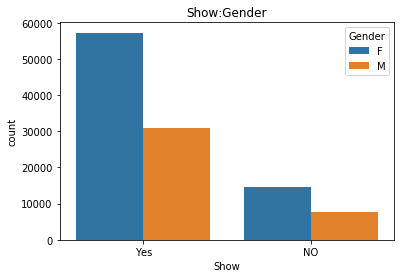

In [97]:
ax= sns.countplot(x="Show", hue="Gender", data=df)
plt.title("Show:Gender")
plt.show()

                                              this visualization is useful to know the relation between showing and Gender

<a id='Age'></a>
# Age_percentage_Show

In [98]:
counter=0
counter2=9
for i in range(0,11):  
        filter_1 = df[df['Show'] == 'Yes']
        result_1=  filter_1[(filter_1['Age'] >=counter) &( filter_1['Age']<=counter2)]
        conclusion_1=len(result_1)/len(df)
        filter_2 = df[df['Show'] == 'NO']
        result_2= filter_2[(filter_2['Age'] >=counter) &( filter_2['Age']<=counter2)]
        conclusion_2=len(result_2)/len(df)
        print("percentage of people who show up in age from ",counter,":",counter2,".",conclusion_1*100)
        print("percentage of people who didnot show up in age from ",counter,":",counter2,".",conclusion_2*100)
        counter+=10
        counter2+=10
        

percentage of people who show up in age from  0 : 9 . 12.65855997683803
percentage of people who didnot show up in age from  0 : 9 . 3.1521994824747117
percentage of people who show up in age from  10 : 19 . 8.75721549680618
percentage of people who didnot show up in age from  10 : 19 . 2.9468179432893615
percentage of people who show up in age from  20 : 29 . 9.336264770280296
percentage of people who didnot show up in age from  20 : 29 . 3.058103975535168
percentage of people who show up in age from  30 : 39 . 10.740459258455024
percentage of people who didnot show up in age from  30 : 39 . 2.9857228163509038
percentage of people who show up in age from  40 : 49 . 10.250076904981634
percentage of people who didnot show up in age from  40 : 49 . 2.6057217306335163
percentage of people who show up in age from  50 : 59 . 11.840652878055842
percentage of people who didnot show up in age from  50 : 59 . 2.5116262236939724
percentage of people who show up in age from  60 : 69 . 9.125454644

<a id='Neighbourhood'></a>
# Neighbourhood_percentage_Show

In [99]:
for counter in df['Neighbourhood'].unique():
        filter_1 = df[df['Show'] == 'Yes']
        result_1=  filter_1[filter_1['Neighbourhood'] == counter]
        conclusion_1=len(result_1)/len(df)
        filter_2 = df[df['Show'] == 'NO']
        result_2= filter_2[filter_2['Neighbourhood'] == counter]
        conclusion_2=len(result_2)/len(df)
        print("percentege of people who show up from",counter,":",conclusion_1*100)
        print("percentege of people who didnot show up from",counter,":",conclusion_2*100)                    

percentege of people who show up from JARDIM DA PENHA : 2.9368655339015253
percentege of people who didnot show up from JARDIM DA PENHA : 0.570906393065885
percentege of people who show up from MATA DA PRAIA : 0.48314423755496444
percentege of people who didnot show up from MATA DA PRAIA : 0.09952409387836347
percentege of people who show up from PONTAL DE CAMBURI : 0.05157157591878834
percentege of people who didnot show up from PONTAL DE CAMBURI : 0.01085717387763965
percentege of people who show up from REPÚBLICA : 0.6260970269438865
percentege of people who didnot show up from REPÚBLICA : 0.1293813220418725
percentege of people who show up from GOIABEIRAS : 0.5093824077592602
percentege of people who didnot show up from GOIABEIRAS : 0.12395273510305267
percentege of people who show up from ANDORINHAS : 1.5751949767475526
percentege of people who didnot show up from ANDORINHAS : 0.4713822991875215
percentege of people who show up from CONQUISTA : 0.6233827334744766
percentege of peo

percentege of people who show up from FORTE SÃO JOÃO : 1.3960516077664984
percentege of people who didnot show up from FORTE SÃO JOÃO : 0.31304851347194323
percentege of people who show up from FONTE GRANDE : 0.48223947306516113
percentege of people who didnot show up from FONTE GRANDE : 0.13480990898069234
percentege of people who show up from ENSEADA DO SUÁ : 0.16557190163400468
percentege of people who didnot show up from ENSEADA DO SUÁ : 0.047047753469771816
percentege of people who show up from SANTOS REIS : 0.39357255306443734
percentege of people who didnot show up from SANTOS REIS : 0.10133362285797007
percentege of people who show up from PIEDADE : 0.32933427428840273
percentege of people who didnot show up from PIEDADE : 0.07961927510269078
percentege of people who show up from JESUS DE NAZARETH : 1.9515770045057272
percentege of people who didnot show up from JESUS DE NAZARETH : 0.6297160849030997
percentege of people who show up from SANTA TEREZA : 0.9590503591915024
percen

In [ ]:
df.groupby(["Neighbourhood", "Show"])["Show"].size().unstack(fill_value=0).plot.bar(figsize = (50,30))
plt.title('relation between showing and neighbourhood')
plt.show()

                                          this visualization is useful to know how many people came from every neighbourhood

<a id='conclusions'></a>
## Conclusions

> 1-in this section we conclused  the percentage between showing and having alcholic problems and we conclused that: people who Showed and have Alcoholic problem is 2.427%, and people who didn't Show and have Alcholic problem is 0.613%, and people who Showed and don't have Alcholic problem is 77.379% , and people who didn't Show and don't have Alcholic problem is 19.581%,It's seem balancing percent. 


<ul>
<li><a href="#alcholism">Alcholism</a></li>
</ul>

> 2-in this section we conclused  the percentage between showing and having diabetes and we conclused that: people who Showed and have diabetes is 5.893%, and people who didn't Show and have diabetes  is 1.293%, and people who Showed and don't have diabetes  is 73.914% , and people who didn't Show and don't have diabetes is 18.9%,It's seem balancing percent.


<ul>
<li><a href="#Diabetes">Diabetes</a></li>
</ul>

> 3-in this section we conclused  the percentage between showing and recieving SMS and we conclused that: people who Showed and recieved SMS is 23.251%, and people who didn't Show and recieved SMS is 8.852%, and people who Showed and didn't recieved SMS  is 56.556% , and people who didn't Show and didn't recieved SMS is 11.341%,It's clear that SMS had a counterproductive.

<ul>
<li><a href="#SMS">SMS</a></li>
</ul>

> 4_in this section we conclused  the percentage between showing and Gender and we conclused that: people who Showed and Male is 28.013%, and people who didn't Show and Male is 6.989%, and people who Showed and  Female is 51.793% , and people who didn't Show and Female recieved SMS is 13.204%,gender hadn't effect also in showing up.

<ul>
<li><a href="#Gender">Gender</a></li>
</ul>

>5_Hipertension also have no big effect in showing up

<ul>
<li><a href="#Hipertension">Hipertension</a></li>
</ul>

>6-Scholarship and Show plotting

<ul>
<li><a href="#Scholarship">Scholarship</a></li>
</ul>

>7_Age Percenting in Showing

<ul>
<li><a href="#Age">Age</a></li>
</ul>

>8_Neighbourhood Percenting in Showing

<ul>
<li><a href="#Neighbourhood">Neighbourhood</a></li>
</ul
    
## limitations

>1-I depended in these analysis in some important factors like Age ,Scholarship,Neighbourhood,Hipertension,Gender,SMS,Diabetes and Alcholism,which i thought it's very useful.

>2-I didn't use PatientId ,	AppointmentID ,ScheduledDay ,AppointmentDay and Handcap because i thought it's just useful for dat
    
    
    
    
    
    
    
    
    
    
    

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])